In [3]:
import pandas as pd
import numpy as np

import random
import time
from os import getcwd 
from os.path import exists

getcwd() # current working directory

'D:\\project\\MIT_glyco'

In [4]:
version = 'v2'
update = False

# dataset for machine learning

In [5]:
### This part is grouping the positive sites of protein with same name ###
time_start = time.time()

# load O-GlcNAcylated site data
load_name = f'data_for_ml_v2.csv'
ml_data = pd.read_csv(load_name, header=0, index_col=0) 

In [28]:
ml_data_positive = ml_data[ml_data["positive"]==1]
ml_data_negative = ml_data[ml_data["positive"]==0]
print("total number of positive sites:", len(ml_data_positive))
print("total number of negative sites:", len(ml_data_negative))

total number of positive sites: 538
total number of negative sites: 42282


In [5]:
# the number of positive sites = 538
ml_data_positive

,name,index,SEQ,positive,window,nSer,nThr,nAli,nPos,P_after,...,ASA,Phi,Psi,Theta(i-1=>i+1),Tau(i-2=>i+2),HSE_alpha_up,HSE_alpha_down,P(C),P(H),P(E)
65,A2ABU4,429,T,1,"WMPCLKAPGG""T""CRCPIQGLVE",0,0,1,1,False,...,63.4,-107.9,135.3,120.2,-35.5,10.1,22.2,0.707,0.013,0.280
254,A2AGT5,567,S,1,"GKTTAPGGSA""S""AGTKNKKGLE",1,3,1,0,False,...,72.1,-85.8,117.2,109.6,-131.2,6.4,12.0,0.795,0.173,0.032
474,A2AHJ4,263,S,1,"CAPVAVLQGH""S""ASITSIQFCP",2,1,0,0,False,...,61.4,-88.6,-3.1,101.1,-144.8,9.1,24.1,0.972,0.003,0.025
480,A2AHJ4,278,T,1,"SIQFCPSTKG""T""TRYLTSTGAD",3,4,0,0,False,...,62.1,-100.6,124.5,115.3,88.0,10.7,17.6,0.895,0.020,0.086
728,A2AKB9,86,T,1,"APGALELSAA""T""ASASQAKLSP",4,0,2,0,False,...,27.0,-69.8,-35.4,94.6,51.5,18.9,22.2,0.208,0.428,0.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41269,Q9UPN6,614,T,1,"SEPVKETVQT""T""QSPTPVEKET",2,4,1,1,False,...,105.5,-84.3,2.7,102.9,82.0,2.6,9.9,0.941,0.037,0.022
41990,Q9UQ35,2235,S,1,"ANLASRIPAA""S""AAAMNLASAR",2,0,3,1,False,...,65.6,-68.0,-35.7,95.7,56.7,4.9,14.7,0.526,0.470,0.004
42339,Q9Y2X9,890,S,1,"PCSTRVKTPT""S""QSYR",2,3,1,1,False,...,62.7,-83.8,-1.6,103.3,140.9,9.9,14.2,0.628,0.114,0.258
42679,Q9Y520,2242,T,1,"SSSLTSVPPT""T""FSLTFKMESA",6,3,2,0,False,...,60.7,-104.6,131.4,117.4,-146.8,10.7,22.8,0.827,0.127,0.047


In [6]:
print("positive sites")
display(ml_data_positive["window"].apply(lambda x: x[x.find('"')-1:x.find('"')+4]).value_counts()/len(ml_data_positive)*100) # analyze -1/+1 window
print()
print("negative sites")
display(ml_data_negative["window"].apply(lambda x: x[x.find('"')-1:x.find('"')+4]).value_counts()/len(ml_data_negative)*100)

positive sites


S"S"A    2.602230
V"S"S    2.416357
S"S"S    2.044610
T"T"S    2.044610
T"S"S    1.858736
           ...   
H"S"T    0.185874
S"T"E    0.185874
L"T"V    0.185874
Q"T"I    0.185874
T"T"Q    0.185874
Name: window, Length: 266, dtype: float64


negative sites


S"S"S    1.757249
S"S"P    0.827775
P"S"P    0.721347
P"S"S    0.709522
S"S"T    0.690601
           ...   
M"S"W    0.002365
Y"T"     0.002365
E"S"     0.002365
T"S"     0.002365
G"T"     0.002365
Name: window, Length: 821, dtype: float64

In [7]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42820 entries, 0 to 42819
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             42820 non-null  object 
 1   index            42820 non-null  int64  
 2   SEQ              42820 non-null  object 
 3   positive         42820 non-null  int64  
 4   window           42820 non-null  object 
 5   nSer             42820 non-null  int64  
 6   nThr             42820 non-null  int64  
 7   nAli             42820 non-null  int64  
 8   nPos             42820 non-null  int64  
 9   P_after          42820 non-null  object 
 10  flexibility      42820 non-null  float64
 11  SS               42820 non-null  object 
 12  SS_angle         42820 non-null  object 
 13  side-1           42820 non-null  object 
 14  side1            42820 non-null  object 
 15  side2            42820 non-null  object 
 16  side3            42820 non-null  object 
 17  side4       

In [29]:
ml_data_mod = ml_data.astype({'nSer': 'object', 'nThr': 'object', 'nAli': 'object', 'nPos': 'object'})
ml_data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42820 entries, 0 to 42819
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             42820 non-null  object 
 1   index            42820 non-null  int64  
 2   SEQ              42820 non-null  object 
 3   positive         42820 non-null  int64  
 4   window           42820 non-null  object 
 5   nSer             42820 non-null  object 
 6   nThr             42820 non-null  object 
 7   nAli             42820 non-null  object 
 8   nPos             42820 non-null  object 
 9   P_after          42820 non-null  object 
 10  flexibility      42820 non-null  float64
 11  SS               42820 non-null  object 
 12  SS_angle         42820 non-null  object 
 13  side-1           42820 non-null  object 
 14  side1            42820 non-null  object 
 15  side2            42820 non-null  object 
 16  side3            42820 non-null  object 
 17  side4       

In [7]:
cat_columns = ["nSer", "nThr", "nAli", "nPos", "P_after", "SEQ", "SS", "SS_angle", "side-1", "side1", "side2", "side3", "side4", "side5"]
ml_data_cat = pd.get_dummies(ml_data_mod[cat_columns])
print("categorical data:", ml_data_cat.shape)
display(ml_data_cat.head(1))

print()

cts_columns = ["flexibility"]
ml_data_cts = pd.get_dummies(ml_data[cts_columns])
print("continuous data:", ml_data_cts.shape)
display(ml_data_cts.head(1))

print()

y_columns = ["positive"]
ml_data_y = ml_data[y_columns]
print("label data:", ml_data_y.shape)
display(ml_data_y.head(1))

categorical data: (42820, 106)


C:\Users\honsu\AppData\Local\Temp\ipykernel_20956\3226566750.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  ml_data_cat = pd.get_dummies(ml_data_mod[cat_columns])


,nSer_0,nSer_1,nSer_2,nSer_3,nSer_4,nSer_5,nSer_6,nSer_7,nSer_8,nSer_9,...,side4_small,side4_very small,side5_0,side5_cycle,side5_gly,side5_long,side5_normal,side5_pro,side5_small,side5_very small
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0



continuous data: (42820, 1)


,flexibility
0,0.384



label data: (42820, 1)


,positive
0,0


In [8]:
ml_data_cat.columns

Index(['nSer_0', 'nSer_1', 'nSer_2', 'nSer_3', 'nSer_4', 'nSer_5', 'nSer_6',
       'nSer_7', 'nSer_8', 'nSer_9',
       ...
       'side4_small', 'side4_very small', 'side5_0', 'side5_cycle',
       'side5_gly', 'side5_long', 'side5_normal', 'side5_pro', 'side5_small',
       'side5_very small'],
      dtype='object', length=106)

# MLP model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

patience = 20
early_stopping_cb = EarlyStopping(patience=patience, restore_best_weights=True, monitor='val_loss')

In [10]:
def basicMLP(x_dim, y_dim, n_layers, n_neurons):
    mlp_input = Input(shape=(x_dim,), name='dense_input')
    
    # MLP module
    for i in range(n_layers):
        if i==0:
            dense_output = Dense(n_neurons, name=f"dense_{i+1}")(mlp_input)
        else: 
            dense_output = Dense(n_neurons, name=f"dense_{i+1}")(dense_output)
    mlp_output = Dense(y_dim, name=f"dense_output", activation='sigmoid')(dense_output)
    
    model = Model(mlp_input, mlp_output)
    optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999)
    model.compile(loss='binary_crossentropy',optimizer = optimizer, metrics=['accuracy'])
    
    return model

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_confusion(y_real, y_pred, title, label=["True", "False"], size=4):
    if y_real.max() == 1:
        cm = confusion_matrix(y_real, y_pred)
        cm = cm.flatten()[::-1].reshape(2,2)
        plt.figure(figsize=(size*1.2,size))
        heatmap(cm, annot=True, fmt='.0f',
                cmap='Blues', 
                xticklabels=label, yticklabels=label)
        plt.title(title)
        plt.xlabel("Predicted")
        plt.ylabel("Real")
        plt.show()
        
        accuracy  = 100*np.array(accuracy_score(y_real, y_pred)).round(4)
        precision = 100*np.array(precision_score(y_real, y_pred, average=None)).round(4)
        recall    = 100*np.array(recall_score(y_real, y_pred, average=None)).round(4)
        f1        = 100*np.array(f1_score(y_real, y_pred, average=None)).round(4)
        print(f"accuracy  : {accuracy}")
        print(f"precision : {precision}")
        print(f"recall    : {recall}")
        print(f"f1_score  : {f1}")

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

def stratified_split(data_x, data_y, random_state=1, test_size=0.2, n_splits=1, dtype='arr'):
    split = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    train_x,train_y, test_x, test_y  = [], [], [], []
    
    if dtype=='df':
        data_x = data_x.values
        data_y = data_y.values
    
    for train_index, test_index in split.split(target_x, target_y):
        train_x.append(data_x[train_index])
        train_y.append(data_y[train_index])

        test_x.append(data_x[test_index])
        test_y.append(data_y[test_index])
        
    print("train/test dataset")
    print("train:", train_x[0].shape, train_y[0].shape)
    print("test:", test_x[0].shape, test_y[0].shape)
    
    if n_splits == 1:
        return train_x[0],train_y[0], test_x[0], test_y[0]
    else:
        return train_x, train_y, test_x, test_y

## basic MLP
train 80%(valid 20%) 34256 / test 20% 8564, 
positives 430 / 108, 
negatives 33826 / 8456

In [81]:
### select input/output variables of machine learning model ###
x_cts = ["flexibility"]
x_cat = ["nSer", "nThr", "nAli", "SEQ", "nPos", "P_after", "side-1", "side1", "side2", "side3", "side4", "side5", 
           "SS", "SS_angle"]

y_cts = ["positive"]
y_cat = []

var_x = x_cts + x_cat
var_y = y_cts + y_cat

### make dummy dataset of categorical variables ###
data = ml_data.copy()

data_x_cts = data[x_cts]
data_x_cat = data[x_cat].astype('object')
data_x_cat = pd.get_dummies(data_x_cat)

### split data into train/test dataset ###
valid_size = 0.2
test_size = 0.2
random_state = 1

data_x = pd.concat([data_x_cts, data_x_cat], axis=1)
data_y = data[var_y]
train_x, train_y, test_x, test_y = stratified_split(data_x, data_y, random_state=random_state, test_size=test_size,
                                                    dtype='df')

### data scaling of continuous variables ###
train_x_sc = train_x[:,:len(var_cts)]
test_x_sc = test_x[:,:len(var_cts)]

x_min = train_x_sc.min(axis=0)
x_max = train_x_sc.max(axis=0)

train_x_sc = (train_x_sc-x_min)/(x_max-x_min)
test_x_sc = (test_x_sc-x_min)/(x_max-x_min)

train_x[:,:len(var_cts)] = train_x_sc
test_x[:,:len(var_cts)] = test_x_sc

C:\Users\honsu\AppData\Local\Temp\ipykernel_20956\2542842690.py:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_x_cat = pd.get_dummies(data_x_cat)


train/test dataset
train: (34256, 107) (34256, 1)
test: (8564, 107) (8564, 1)


In [87]:
model_type = 'basicMLP'
x_dim = train_x.shape[1]
y_dim = train_y.shape[1]
n_layers = 3
n_neurons = 100

model_name = f"{model_type}_{x_dim}_{y_dim}_{n_layers}_{n_neurons}_{random_state}_{version}"
save_path = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

model = basicMLP(x_dim, y_dim, n_layers, n_neurons)
print(model.summary())

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = model.fit(train_x, train_y, verbose=0,
                        epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    model.save_weights(save_path)
    print(f"model is saved to: {save_path}")
    
    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")
    
else:
    model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")
    
    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")
    
basic_mlp = model

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 107)]             0         
                                                                 
 dense_1 (Dense)             (None, 100)               10800     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_output (Dense)        (None, 1)                 101       
                                                                 
Total params: 31,101
Trainable params: 31,101
Non-trainable params: 0
_________________________________________________________________
None
model is loaded from: ./model/basicMLP_107_1_3_100

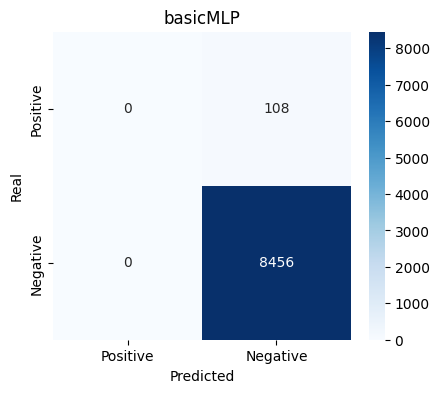

accuracy  : 98.74000000000001
precision : [98.74  0.  ]
recall    : [100.   0.]
f1_score  : [99.37  0.  ]


C:\Users\honsu\anaconda3\envs\glyco\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# evaluate the trained model
prediction = basic_mlp.predict(test_x, verbose=0)
prediction = prediction.round(0).astype(int)

y_real = test_y
y_pred = prediction
    
plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## MLP with up sampling

In [126]:
random_state = 1

### upsampling for train dataset ###
index_pos = np.where(train_y == 1)[0]
index_neg = np.where(train_y == 0)[0]

random.seed(random_state)
up_index = [random.choice(index_pos) for _ in range(len(index_neg))] # get samples from positive sites as much as the number of negative sites

sample_pos_x = train_x[up_index]
sample_pos_y = train_y[up_index]
sample_neg_x = train_x[index_neg]
sample_neg_y = train_y[index_neg]

sample_x = np.concatenate([sample_pos_x, sample_neg_x], axis=0)
sample_y = np.concatenate([sample_pos_y, sample_neg_y], axis=0)

shuffle_index = np.arange(len(sample_x))
np.random.seed(random_state)
np.random.shuffle(shuffle_index)
sample_x = sample_x[shuffle_index]
sample_y = sample_y[shuffle_index]


print("up-sampled train dataset:", sample_x.shape, sample_y.shape)
print("test dataset:", test_x.shape, test_y.shape)

up-sampled train dataset: (67652, 107) (67652, 1)
test dataset: (8564, 107) (8564, 1)


In [127]:
model_type = 'basicMLP_sample'
x_dim = sample_x.shape[1]
y_dim = sample_y.shape[1]
n_layers = 3
n_neurons = 100

model_name = f"{model_type}_{x_dim}_{y_dim}_{n_layers}_{n_neurons}_{random_state}_{version}"
save_path = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

model = basicMLP(x_dim, y_dim, n_layers, n_neurons)
print(model.summary())

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = model.fit(sample_x, sample_y, verbose=0,
                        epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    model.save_weights(save_path)
    print(f"model is saved to: {save_path}")
    
    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")
    
else:
    model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")
    
    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")
    
sample_mlp = model

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 107)]             0         
                                                                 
 dense_1 (Dense)             (None, 100)               10800     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_output (Dense)        (None, 1)                 101       
                                                                 
Total params: 31,101
Trainable params: 31,101
Non-trainable params: 0
_________________________________________________________________
None
model is saved to: ./model/basicMLP_sample_107_1_3

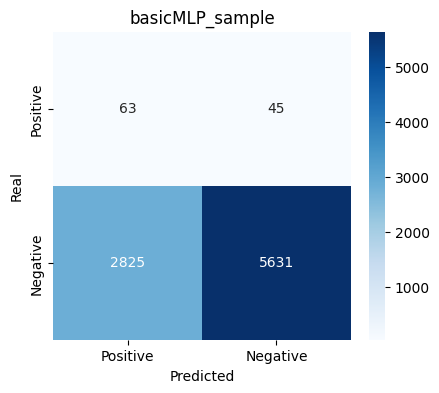

accuracy  : 66.49000000000001
precision : [99.21  2.18]
recall    : [66.59 58.33]
f1_score  : [79.69  4.21]


In [128]:
# evaluate the trained model
prediction = sample_mlp.predict(test_x, verbose=0)
prediction = prediction.round(0).astype(int)

y_real = test_y
y_pred = prediction
    
plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## ensemble MLP

In [158]:
model_type = 'ensembleMLP'
x_dim = train_x.shape[1]
y_dim = train_y.shape[1]
n_models = 200
n_layers = 3
n_neurons = 100

index_pos = np.where(train_y == 1)[0]
index_neg = np.where(train_y == 0)[0]

ensemble_models = []
for i in range(n_models):
    print(f"{i+1}th model")
    random_state = i+1
    
    # upsampling for train dataset
    np.random.seed(random_state)
    ensemble_idx = np.random.choice(index_neg, size=len(index_pos), replace=False) # get negative samples as much as positives
    train_x_neg = train_x[ensemble_idx]
    train_y_neg = train_y[ensemble_idx]
    train_x_pos = train_x[index_pos]
    train_y_pos = train_y[index_pos]
    
    ensemble_x = np.concatenate([train_x_neg, train_x_pos], axis=0)
    ensemble_y = np.concatenate([train_y_neg, train_y_pos], axis=0)
    
    shuffle_index = np.arange(len(ensemble_x))
    np.random.seed(random_state)
    np.random.shuffle(shuffle_index)
    ensemble_x = ensemble_x[shuffle_index]
    ensemble_y = ensemble_y[shuffle_index]
    
    model = basicMLP(x_dim, y_dim, n_layers, n_neurons)
    model_name = f"{model_type}_{x_dim}_{y_dim}_{n_layers}_{n_neurons}_{i+1}_of_{n_models}_{version}"
    save_path = f"./model/{model_name}.h5"
    history_path = f"./result/{model_name}.csv"

    if not exists(save_path) or update:
        tf.random.set_seed(random_state)
        time_start = time.time()
        history = model.fit(ensemble_x, ensemble_y, verbose=0,
                            epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
        time_end = time.time()
        time_elapse = round((time_end - time_start)/60, 3)
        history_df = pd.DataFrame(history.history)
        history_df.index.name = f"{time_elapse} min"

        model.save_weights(save_path)
        print(f"model is saved to: {save_path}")

        history_df.to_csv(history_path)
        print(f"history is saved to: {history_path}")

    else:
        model.load_weights(save_path)
        print(f"model is loaded from: {save_path}")

        history_df = pd.read_csv(history_path, index_col=0, header=0)
        print(f"history is loaded from: {history_path}")
        
    ensemble_models.append(model)

1th model
model is saved to: ./model/ensembleMLP_107_1_3_100_1_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_1_of_200_v2.csv
2th model
model is saved to: ./model/ensembleMLP_107_1_3_100_2_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_2_of_200_v2.csv
3th model
model is saved to: ./model/ensembleMLP_107_1_3_100_3_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_3_of_200_v2.csv
4th model
model is saved to: ./model/ensembleMLP_107_1_3_100_4_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_4_of_200_v2.csv
5th model
model is saved to: ./model/ensembleMLP_107_1_3_100_5_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_5_of_200_v2.csv
6th model
model is saved to: ./model/ensembleMLP_107_1_3_100_6_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_6_of_200_v2.csv
7th model
model is saved to: ./model/ensembleMLP_107_1_3_100_7_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_

model is saved to: ./model/ensembleMLP_107_1_3_100_57_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_57_of_200_v2.csv
58th model
model is saved to: ./model/ensembleMLP_107_1_3_100_58_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_58_of_200_v2.csv
59th model
model is saved to: ./model/ensembleMLP_107_1_3_100_59_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_59_of_200_v2.csv
60th model
model is saved to: ./model/ensembleMLP_107_1_3_100_60_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_60_of_200_v2.csv
61th model
model is saved to: ./model/ensembleMLP_107_1_3_100_61_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_61_of_200_v2.csv
62th model
model is saved to: ./model/ensembleMLP_107_1_3_100_62_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_62_of_200_v2.csv
63th model
model is saved to: ./model/ensembleMLP_107_1_3_100_63_of_200_v2.h5
history is saved to: ./result/ensembleM

model is saved to: ./model/ensembleMLP_107_1_3_100_112_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_112_of_200_v2.csv
113th model
model is saved to: ./model/ensembleMLP_107_1_3_100_113_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_113_of_200_v2.csv
114th model
model is saved to: ./model/ensembleMLP_107_1_3_100_114_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_114_of_200_v2.csv
115th model
model is saved to: ./model/ensembleMLP_107_1_3_100_115_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_115_of_200_v2.csv
116th model
model is saved to: ./model/ensembleMLP_107_1_3_100_116_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_116_of_200_v2.csv
117th model
model is saved to: ./model/ensembleMLP_107_1_3_100_117_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_117_of_200_v2.csv
118th model
model is saved to: ./model/ensembleMLP_107_1_3_100_118_of_200_v2.h5
history is saved to:

model is saved to: ./model/ensembleMLP_107_1_3_100_166_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_166_of_200_v2.csv
167th model
model is saved to: ./model/ensembleMLP_107_1_3_100_167_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_167_of_200_v2.csv
168th model
model is saved to: ./model/ensembleMLP_107_1_3_100_168_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_168_of_200_v2.csv
169th model
model is saved to: ./model/ensembleMLP_107_1_3_100_169_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_169_of_200_v2.csv
170th model
model is saved to: ./model/ensembleMLP_107_1_3_100_170_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_170_of_200_v2.csv
171th model
model is saved to: ./model/ensembleMLP_107_1_3_100_171_of_200_v2.h5
history is saved to: ./result/ensembleMLP_107_1_3_100_171_of_200_v2.csv
172th model
model is saved to: ./model/ensembleMLP_107_1_3_100_172_of_200_v2.h5
history is saved to:

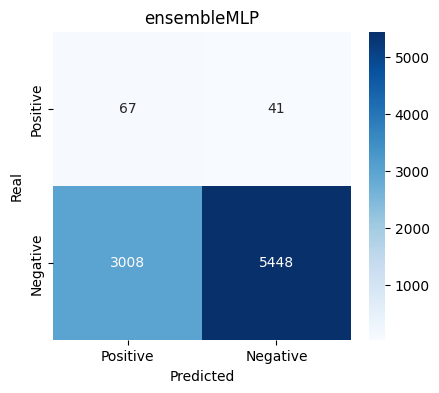

accuracy  : 64.4
precision : [99.25  2.18]
recall    : [64.43 62.04]
f1_score  : [78.14  4.21]


In [160]:
predictions = []
for model in ensemble_models:
    prediction = model.predict(test_x, verbose=0)
    predictions.append(prediction)
    
predictions = np.array(predictions)
prediction_soft = predictions.mean(0)
prediction_soft = prediction_soft.round(0).astype(int)

# plot result
y_real = test_y
y_pred = prediction_soft

plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

# RNN model

In [161]:
save_name = "all_sites_group.csv"
all_sites = pd.read_csv(save_name)
series = all_sites['sequence'].apply(lambda x: pd.Series([f"{i}" for i in x]))
array = series.to_numpy()
ravel = array.reshape(-1)
series = pd.Series(ravel)

'''
Alanine (Ala, A)
Arginine (Arg, R)
Asparagine (Asn, N)
Aspartic acid (Asp, D)
Cysteine (Cys, C)
Glutamic acid (Glu, E)
Glutamine (Gln, Q)
Glycine (Gly, G)
Histidine (His, H)
Isoleucine (Ile, I)
Leucine (Leu, L)
Lysine (Lys, K)
Methionine (Met, M)
Phenylalanine (Phe, F)
Proline (Pro, P)
Serine (Ser, S)
Threonine (Thr, T)
Tryptophan (Trp, W)
Tyrosine (Tyr, Y)
Valine (Val, V)
'''

series.value_counts()

S    26408
L    22207
A    20490
P    19930
E    19446
G    17145
T    16694
K    16144
V    15849
Q    14453
R    14353
D    12784
I    10357
N     9593
F     7609
H     6194
Y     5785
M     5312
C     4323
W     2116
X        2
         1
dtype: int64

In [166]:
def make_string(window_str, window_size):
    index = window_str.find('"')
    return window_str[max(index-window_size,0):index]+window_str[index+1]+window_str[index+3:min(index+3+window_size, len(window_str))]

In [163]:
dictionary = {"A":1, "R":2, "N":3, "D":4, "C":5, 
              "E":6, "Q":7, "G":8, "H":9, "I":10, 
              "L":11, "K":12, "M":13, "F":14, "P":15, 
              "S":16, "T":17, "W":18, "Y":19, "V":20}
num_AA = len(dictionary.keys())

def letter_to_token(letter):
    if letter in dictionary.keys():
        return dictionary[letter]
    else:
        return 0

In [211]:
from tensorflow.keras.optimizers import Adam

def ClassifierLSTM(
    history_size, history_dim, class_num,
    rnn_layers = 1, rnn_neurons = 100,
    dense_layers = 1, dense_neurons = 100,
    optimizer = Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999), loss="binary_crossentropy", metrics = ['accuracy']
):
    encoder_input = Input(shape=(history_size, history_dim), name='input_encoder')
    
    # encoder module
    if rnn_layers == 1:
        encoder_output, state_h, state_c = LSTM(rnn_neurons, return_state=True, name='encoder_last')(encoder_input)
        # encoder_states = [state_h, state_c]
        
    else:
        for i in range(rnn_layers):
            #first encoder layer
            if i==0: 
                encoder_output = LSTM(rnn_neurons, return_sequences=True, name="encoder_1")(encoder_input)
            #mediate encoder layer
            elif i < rnn_layers-1: 
                encoder_output = LSTM(rnn_neurons, return_sequences=True, name=f"encoder_{i+1}")(encoder_output)
            #last encoder layer
            else: 
                encoder_output, state_h, state_c  = LSTM(rnn_neurons, return_state=True, name=f"encoder_last")(encoder_output)
                # encoder_states = [state_h, state_c]
    
    # dense module
    if dense_layers == 1:
        dense_output = Dense(dense_neurons, name='dense_1')(encoder_output)
    else:
        for i in range(dense_layers):
            #first dense layer
            
            if i==0:
                dense_output = Dense(dense_neurons, name='dense_1')(encoder_output)
            #mediate encoder layer
            else:
                dense_output = Dense(dense_neurons, name=f'dense_{i+1}')(dense_output)
    dense_output = Dense(1, activation='sigmoid', name=f'dense_last')(dense_output)  
    
    # model compile
    model = Model(encoder_input, dense_output)
    model.compile(loss=loss,optimizer = optimizer, metrics=metrics)
    
    return model

## basic RNN

In [212]:
### data reshape for generating RNN dataset ###
### (# of samples, window size, # of AA types) ###

window_step = 10
window_size = 2*window_step+1

rnn_input = []
for i in range(len(ml_data)):
    sample = ml_data.iloc[i]
    name = sample['name']
    
    if name == ml_data.iloc[i-1]['name'] and i != 0:
        pass
    else:
        protein_ss = pd.read_csv(f"./protein_sequence/{name}.csv", index_col=0)
    center_index = sample['index']
    start_index = max(0, center_index-window_step)
    end_index = min(center_index+window_step+1, len(protein_ss))
    
    protein_window = protein_ss.iloc[start_index:end_index]
    sequence_AA = protein_window['SEQ']
    sequence_token = sequence_AA.apply(letter_to_token)
    sequence_onehot = []
    for AA_token in sequence_token:
            if AA_token > 0:
                sequence_onehot.append(np.eye(num_AA)[AA_token-1])
            else:
                sequence_onehot.append(np.zeros(num_AA))
    while len(sequence_onehot) < window_size:
        sequence_onehot.append(np.zeros(num_AA))
    sequence_onehot = np.array(sequence_onehot)
    rnn_input.append(sequence_onehot)
    
rnn_input = np.array(rnn_input)
print("rnn_input shape:", rnn_input.shape)

### split data into train/test dataset ###
valid_size = 0.2
test_size = 0.2
random_state = 1

data_x = rnn_input
data_y = data[var_y].values
train_rnn_x, train_rnn_y, test_rnn_x, test_rnn_y = stratified_split(data_x, data_y, random_state=random_state, test_size=test_size,
                                                    dtype='arr')

rnn_input shape: (42820, 21, 20)
train/test dataset
train: (34256, 21, 20) (34256, 1)
test: (8564, 21, 20) (8564, 1)


In [214]:
model_type = 'basicRNN'

history_size = train_rnn_x.shape[1]
history_dim = train_rnn_x.shape[2]
y_dim = test_rnn_y.shape[1]
rnn_layers = 1
rnn_neurons = 100
dense_layers = 3
dense_neurons = 100


model_name   = f"{model_type}_{history_dim}_{y_dim}_{rnn_layers}_{rnn_neurons}_{dense_layers}_{dense_neurons}_{random_state}_{version}"
save_path    = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

model = ClassifierLSTM(history_size, history_dim, y_dim,
                       rnn_layers = rnn_layers, rnn_neurons = rnn_neurons,
                       dense_layers = dense_layers, dense_neurons = dense_neurons) 
print(model.summary())

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = model.fit(train_rnn_x, train_rnn_y, verbose=2,
                        epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    model.save_weights(save_path)
    print(f"model is saved to: {save_path}")
    
    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")
    
else:
    model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")
    
    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")
    
basic_rnn = model

Model: "model_248"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 21, 20)]          0         
                                                                 
 encoder_last (LSTM)         [(None, 100),             48400     
                              (None, 100),                       
                              (None, 100)]                       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_last (Dense)          (None, 1)                 10

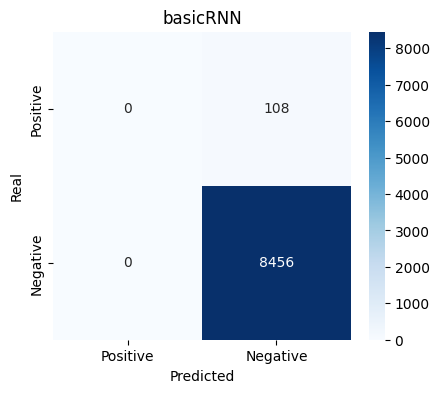

accuracy  : 98.74000000000001
precision : [98.74  0.  ]
recall    : [100.   0.]
f1_score  : [99.37  0.  ]


C:\Users\honsu\anaconda3\envs\glyco\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
# evaluate the trained model
prediction = basic_rnn.predict(test_rnn_x, verbose=0)
prediction = prediction.round(0).astype(int)

y_real = test_rnn_y
y_pred = prediction
    
plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## basic RNN with up sampling

In [221]:
random_state = 1

### upsampling for train dataset ###
index_pos = np.where(train_rnn_y == 1)[0]
index_neg = np.where(train_rnn_y == 0)[0]

random.seed(random_state)
up_index = [random.choice(index_pos) for _ in range(len(index_neg))] # get samples from positive sites as much as the number of negative sites

sample_pos_x = train_rnn_x[up_index]
sample_pos_y = train_rnn_y[up_index]
sample_neg_x = train_rnn_x[index_neg]
sample_neg_y = train_rnn_y[index_neg]

sample_rnn_x = np.concatenate([sample_pos_x, sample_neg_x], axis=0)
sample_rnn_y = np.concatenate([sample_pos_y, sample_neg_y], axis=0)

shuffle_index = np.arange(len(sample_x))
np.random.seed(random_state)
np.random.shuffle(shuffle_index)
sample_rnn_x = sample_rnn_x[shuffle_index]
sample_rnn_y = sample_rnn_y[shuffle_index]


print("up-sampled train dataset:", sample_rnn_x.shape, sample_rnn_y.shape)
print("test dataset:", test_rnn_x.shape, test_rnn_y.shape)

up-sampled train dataset: (67652, 21, 20) (67652, 1)
test dataset: (8564, 21, 20) (8564, 1)


In [222]:
model_type = 'RNN_sample'

history_size = sample_rnn_x.shape[1]
history_dim = sample_rnn_x.shape[2]
y_dim = test_rnn_y.shape[1]
rnn_layers = 1
rnn_neurons = 100
dense_layers = 3
dense_neurons = 100

model_name   = f"{model_type}_{history_dim}_{y_dim}_{rnn_layers}_{rnn_neurons}_{dense_layers}_{dense_neurons}_{random_state}_{version}"
save_path    = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

model = ClassifierLSTM(history_size, history_dim, y_dim,
                       rnn_layers = rnn_layers, rnn_neurons = rnn_neurons,
                       dense_layers = dense_layers, dense_neurons = dense_neurons) 
print(model.summary())

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = model.fit(sample_rnn_x, sample_rnn_y, verbose=2,
                        epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    model.save_weights(save_path)
    print(f"model is saved to: {save_path}")
    
    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")
    
else:
    model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")
    
    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")
    
sample_rnn = model

Model: "model_249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 21, 20)]          0         
                                                                 
 encoder_last (LSTM)         [(None, 100),             48400     
                              (None, 100),                       
                              (None, 100)]                       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_last (Dense)          (None, 1)                 10

Epoch 54/1000
1692/1692 - 40s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0151 - val_accuracy: 0.9971 - 40s/epoch - 23ms/step
Epoch 55/1000
1692/1692 - 36s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0124 - val_accuracy: 0.9975 - 36s/epoch - 21ms/step
Epoch 56/1000
1692/1692 - 38s - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0209 - val_accuracy: 0.9957 - 38s/epoch - 23ms/step
Epoch 57/1000
1692/1692 - 37s - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0161 - val_accuracy: 0.9965 - 37s/epoch - 22ms/step
model is saved to: ./model/RNN_sample_20_1_1_100_3_100_1_v2.h5
history is saved to: ./result/RNN_sample_20_1_1_100_3_100_1_v2.csv


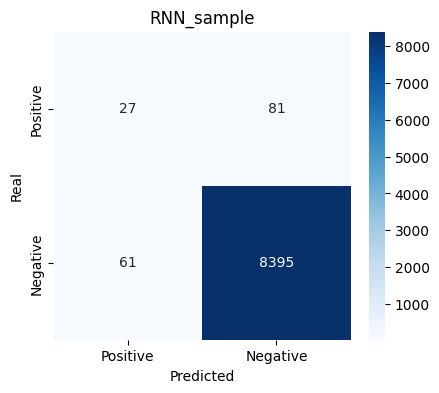

accuracy  : 98.34
precision : [99.04 30.68]
recall    : [99.28 25.  ]
f1_score  : [99.16 27.55]


In [223]:
# evaluate the trained model
prediction = sample_rnn.predict(test_rnn_x, verbose=0)
prediction = prediction.round(0).astype(int)

y_real = test_rnn_y
y_pred = prediction
    
plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])

## RNN with more information

In [232]:
### data reshape for generating RNN dataset ###
### (# of samples, window size, # of AA types) ###

window_step = 10
window_size = 2*window_step+1

add_feature = ['flexibility', 'ASA', 'Phi', 'Psi', 'Theta(i-1=>i+1)', 'Tau(i-2=>i+2)', 
               'HSE_alpha_up', 'HSE_alpha_down', 'P(C)', 'P(H)', 'P(E)']

rnn_input = []
for i in range(len(ml_data)):
    sample = ml_data.iloc[i]
    name = sample['name']
    
    if name == ml_data.iloc[i-1]['name'] and i != 0:
        pass
    else:
        protein_ss = pd.read_csv(f"./protein_sequence/{name}.csv", index_col=0)
    center_index = sample['index']
    start_index = max(0, center_index-window_step)
    end_index = min(center_index+window_step+1, len(protein_ss))
    
    protein_window = protein_ss.iloc[start_index:end_index]
    sequence_AA = protein_window['SEQ']
    sequence_token = sequence_AA.apply(letter_to_token)
    sequence_onehot = []
    for AA_token in sequence_token:
            if AA_token > 0:
                sequence_onehot.append(np.eye(num_AA)[AA_token-1])
            else:
                sequence_onehot.append(np.zeros(num_AA))
    sequence_onehot = np.array(sequence_onehot)
    sequence_add = protein_window[add_feature].to_numpy()
    sequence_con = np.concatenate([sequence_onehot, sequence_add], axis=1)
    while len(sequence_con) < window_size:
        sequence_con = np.concatenate([sequence_con, np.zeros((1,sequence_con.shape[1]))], axis=0)
    rnn_input.append(sequence_con)
    
rnn_input = np.array(rnn_input)
print("rnn_input shape:", rnn_input.shape)

### split data into train/test dataset ###
valid_size = 0.2
test_size = 0.2
random_state = 1

data_x = rnn_input
data_y = data[var_y].values
train_rnn_x, train_rnn_y, test_rnn_x, test_rnn_y = stratified_split(data_x, data_y, random_state=random_state, test_size=test_size,
                                                    dtype='arr')

### data scaling of continuous variables ###
train_rnn_x_sc = train_rnn_x[:,:,-len(add_feature):]
test_rnn_x_sc = test_rnn_x[:,:,-len(add_feature):]

rnn_min = train_rnn_x_sc.min(axis=0).min(axis=0)
rnn_max = train_rnn_x_sc.max(axis=0).max(axis=0)

train_rnn_x_sc = (train_rnn_x_sc-rnn_min)/(rnn_max-rnn_min)
test_rnn_x_sc = (test_rnn_x_sc-rnn_min)/(rnn_max-rnn_min)

train_rnn_x[:,:,-len(add_feature):] = train_rnn_x_sc
test_rnn_x[:,:,-len(add_feature):] = test_rnn_x_sc

rnn_input shape: (42820, 21, 31)
train/test dataset
train: (34256, 21, 31) (34256, 1)
test: (8564, 21, 31) (8564, 1)


In [233]:
random_state = 1

### upsampling for train dataset ###
index_pos = np.where(train_rnn_y == 1)[0]
index_neg = np.where(train_rnn_y == 0)[0]

random.seed(random_state)
up_index = [random.choice(index_pos) for _ in range(len(index_neg))] # get samples from positive sites as much as the number of negative sites

sample_pos_x = train_rnn_x[up_index]
sample_pos_y = train_rnn_y[up_index]
sample_neg_x = train_rnn_x[index_neg]
sample_neg_y = train_rnn_y[index_neg]

sample_rnn_x = np.concatenate([sample_pos_x, sample_neg_x], axis=0)
sample_rnn_y = np.concatenate([sample_pos_y, sample_neg_y], axis=0)

shuffle_index = np.arange(len(sample_x))
np.random.seed(random_state)
np.random.shuffle(shuffle_index)
sample_rnn_x = sample_rnn_x[shuffle_index]
sample_rnn_y = sample_rnn_y[shuffle_index]

print("up-sampled train dataset:", sample_rnn_x.shape, sample_rnn_y.shape)
print("test dataset:", test_rnn_x.shape, test_rnn_y.shape)

up-sampled train dataset: (67652, 21, 31) (67652, 1)
test dataset: (8564, 21, 31) (8564, 1)


In [236]:
model_type = 'RNN_additional'

history_size = sample_rnn_x.shape[1]
history_dim = sample_rnn_x.shape[2]
y_dim = test_rnn_y.shape[1]
rnn_layers = 1
rnn_neurons = 100
dense_layers = 3
dense_neurons = 100

model_name   = f"{model_type}_{history_dim}_{y_dim}_{rnn_layers}_{rnn_neurons}_{dense_layers}_{dense_neurons}_{random_state}_{version}"
save_path    = f"./model/{model_name}.h5"
history_path = f"./result/{model_name}.csv"

model = ClassifierLSTM(history_size, history_dim, y_dim,
                       rnn_layers = rnn_layers, rnn_neurons = rnn_neurons,
                       dense_layers = dense_layers, dense_neurons = dense_neurons) 
print(model.summary())

if not exists(save_path) or update:
    tf.random.set_seed(random_state)
    time_start = time.time()
    history = model.fit(sample_rnn_x, sample_rnn_y, verbose=2,
                        epochs=1000, callbacks=[early_stopping_cb], validation_split= valid_size)
    time_end = time.time()
    time_elapse = round((time_end - time_start)/60, 3)
    history_df = pd.DataFrame(history.history)
    history_df.index.name = f"{time_elapse} min"

    model.save_weights(save_path)
    print(f"model is saved to: {save_path}")
    
    history_df.to_csv(history_path)
    print(f"history is saved to: {history_path}")
    
else:
    model.load_weights(save_path)
    print(f"model is loaded from: {save_path}")
    
    history_df = pd.read_csv(history_path, index_col=0, header=0)
    print(f"history is loaded from: {history_path}")
    
additional_rnn = model

Model: "model_250"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_encoder (InputLayer)  [(None, 21, 31)]          0         
                                                                 
 encoder_last (LSTM)         [(None, 100),             52800     
                              (None, 100),                       
                              (None, 100)]                       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_last (Dense)          (None, 1)                 10

Epoch 54/1000
1692/1692 - 39s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0137 - val_accuracy: 0.9974 - 39s/epoch - 23ms/step
Epoch 55/1000
1692/1692 - 37s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0363 - val_accuracy: 0.9915 - 37s/epoch - 22ms/step
model is saved to: ./model/RNN_additional_31_1_1_100_3_100_1_v2.h5
history is saved to: ./result/RNN_additional_31_1_1_100_3_100_1_v2.csv


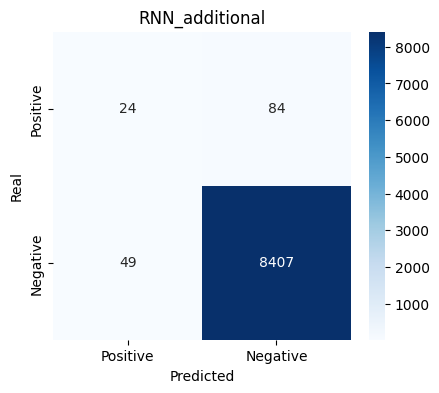

accuracy  : 98.45
precision : [99.01 32.88]
recall    : [99.42 22.22]
f1_score  : [99.22 26.52]


In [237]:
# evaluate the trained model
prediction = additional_rnn.predict(test_rnn_x, verbose=0)
prediction = prediction.round(0).astype(int)

y_real = test_rnn_y
y_pred = prediction
    
plot_confusion(y_real, y_pred, title=model_type, label=["Positive","Negative"])